In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [6]:

# Load the dataset with a progress bar
print("Loading dataset...")
df = pd.read_csv('../data/raw_data/chess/games.csv')

# prog bar
total_rows = len(df)
with tqdm(total=total_rows, unit='row') as pbar:
    for _, _ in df.iterrows():
        pbar.update(1)

# Display basic information about the dataset
print("\nDataset information:")
df.info()

print("\nSample data:")
print(df.head())



Loading dataset...


100%|██████████| 20058/20058 [00:00<00:00, 30403.88row/s]


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usa

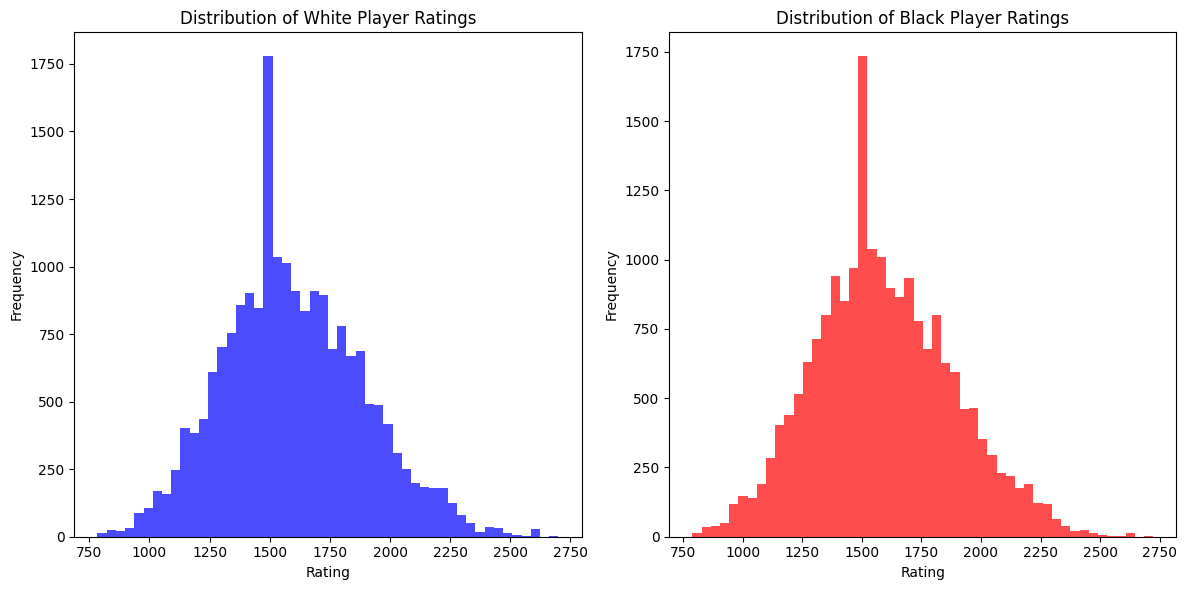

In [7]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Histogram for white player ratings
axs[0].hist(df['white_rating'], bins=50, color='blue', alpha=0.7)
axs[0].set_title('Distribution of White Player Ratings')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Frequency')

# Histogram for black player ratings
axs[1].hist(df['black_rating'], bins=50, color='red', alpha=0.7)
axs[1].set_title('Distribution of Black Player Ratings')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [8]:
print("white pieces skew:", df['white_rating'].skew())
print("black pieces skew:", df['black_rating'].skew())
# positive values indicate that the distribution is right-skewed

white pieces skew: 0.30076617793518806
black pieces skew: 0.25851032951990566


In [9]:
print(df.isnull().sum())  # count of missing values
print(df.isnull().mean())  # percentage of missing values
# no missing val

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64
id                0.0
rated             0.0
created_at        0.0
last_move_at      0.0
turns             0.0
victory_status    0.0
winner            0.0
increment_code    0.0
white_id          0.0
white_rating      0.0
black_id          0.0
black_rating      0.0
moves             0.0
opening_eco       0.0
opening_name      0.0
opening_ply       0.0
dtype: float64


In [10]:
print('white rating')
print(df['white_rating'].quantile([0.25, 0.5, 0.75]))  # quantiles
print(df['white_rating'].quantile(0.75) - df['white_rating'].quantile(0.25))  # IQR

print('\nblack rating')
print(df['black_rating'].quantile([0.25, 0.5, 0.75]))  # quantiles
print(df['black_rating'].quantile(0.75) - df['black_rating'].quantile(0.25))  # IQR

white rating
0.25    1398.0
0.50    1567.0
0.75    1793.0
Name: white_rating, dtype: float64
395.0

black rating
0.25    1391.0
0.50    1562.0
0.75    1784.0
Name: black_rating, dtype: float64
393.0


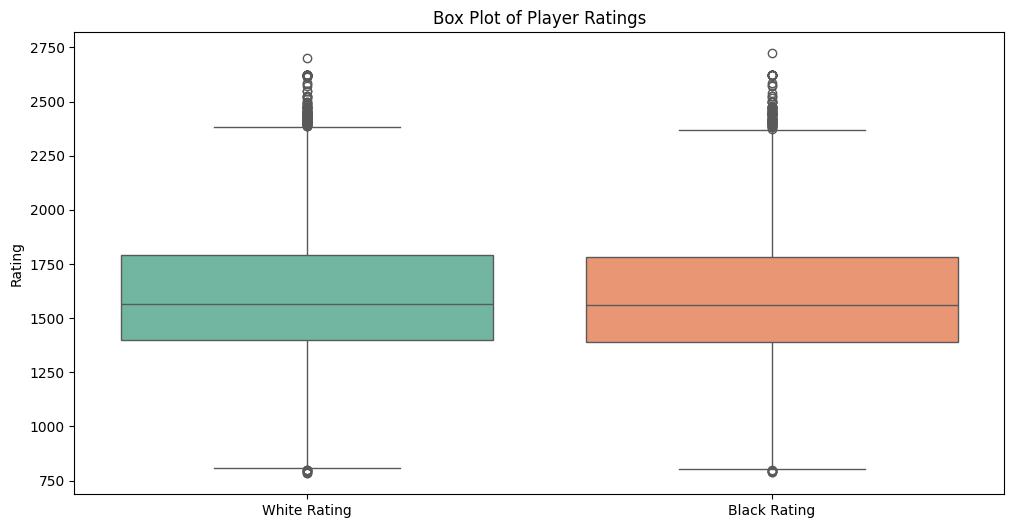

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df['white_rating'], df['black_rating']], palette='Set2')
plt.xticks([0, 1], ['White Rating', 'Black Rating'])
plt.title('Box Plot of Player Ratings')
plt.ylabel('Rating')
plt.show()

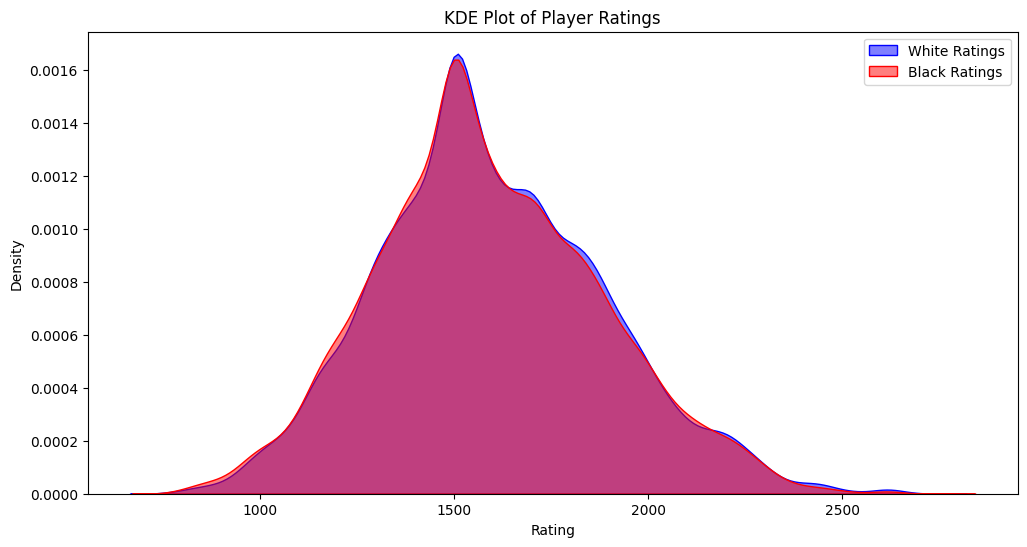

In [14]:
# plt.figure(figsize=(12, 6))
# sns.kdeplot(df['white_rating'], color='blue', label='White Ratings', fill=True, alpha=0.5)
# sns.kdeplot(df['black_rating'], color='red', label='Black Ratings', fill=True, alpha=0.5)
# plt.title('KDE Plot of Player Ratings')
# plt.xlabel('Rating')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

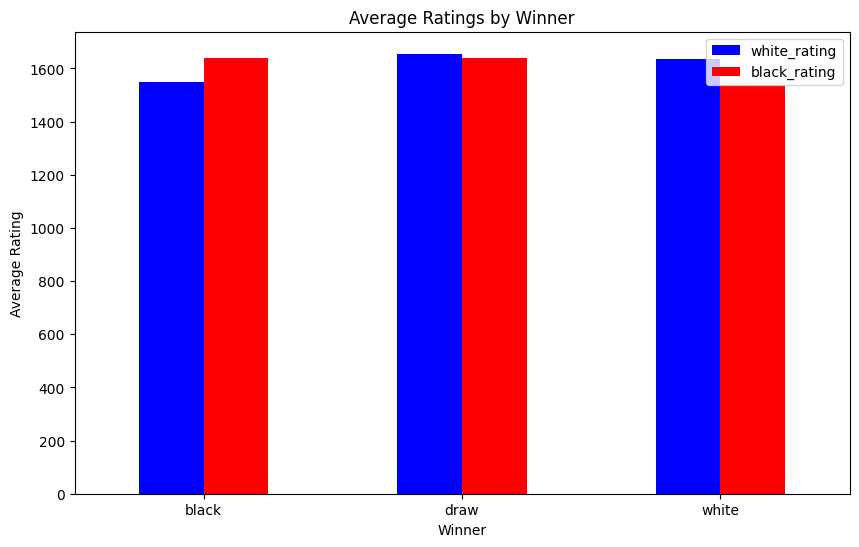

In [15]:
avg_ratings = df.groupby('winner')[['white_rating', 'black_rating']].mean().reset_index()
avg_ratings.plot(x='winner', kind='bar', figsize=(10, 6), color=['blue', 'red'])
plt.title('Average Ratings by Winner')
plt.ylabel('Average Rating')
plt.xlabel('Winner')
plt.xticks(rotation=0)
plt.show()

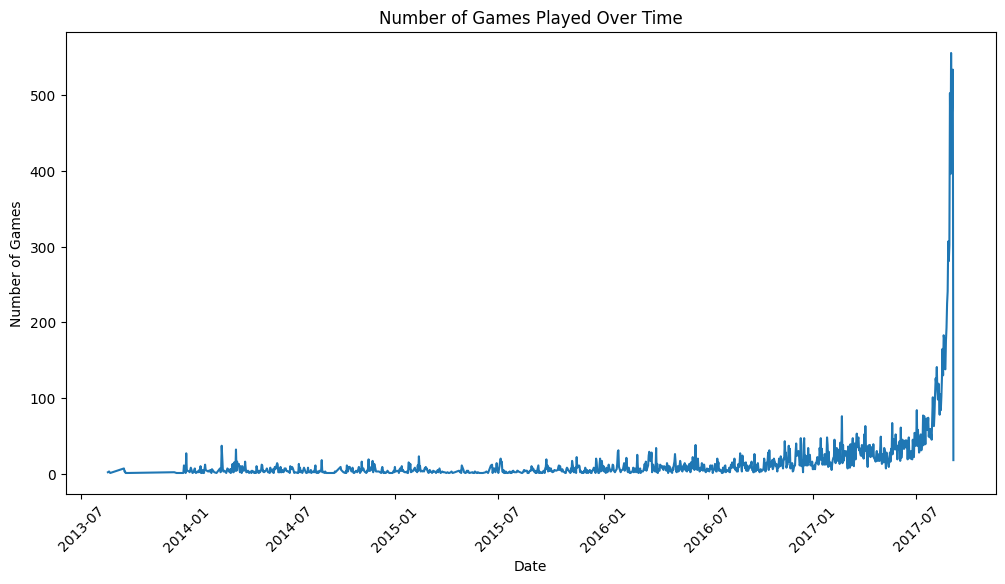

In [18]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')  # Convert to datetime
games_per_day = df.groupby(df['created_at'].dt.date).size()

plt.figure(figsize=(12, 6))
games_per_day.plot()
plt.title('Number of Games Played Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()